Plotting p2p points from a single train 
and ground truth annotations. (Progress Report Visualisations)

In [137]:
# Import and configure modules
# Scikit-learn                  # for non deep machine learning methods
import sys
import numpy as np                      # for data storage & manipulation
import pickle
import pandas as pd                     # for data parsing & manipulation
import math
import os, cv2, glob
import argparse
import pandas as pd
import tensorflow as tf             # for deep learning
from matplotlib import pyplot as plt    # for plotting
from collections import Counter

In [138]:
#Import additional modules
import matplotlib.patches as patches
from matplotlib import rc

In [139]:
# Some basic functions defs - run
def column(matrix, i):
    return [row[i] for row in matrix]

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [140]:
# Setting paths & Defining some variables
p2p_dir = "../../../EGH400/CrowdCounting-P2PNet/"
db_dir = "../../../EGH400/database_del/"

alphabet_set = list(map(chr, range(97, 123)))


In [141]:
# with open(os.path.join(db_dir,"train_gt.txt")) as load_file:
#     old_gt_train = [tuple(line.split()) for line in load_file]

# with open(os.path.join(db_dir,"test_gt.txt")) as load_file:
#     old_gt_test = [tuple(line.split()) for line in load_file]

In [142]:
# Define paths for p2p pred txt files
p2p_pth_test = os.path.join(p2p_dir,"vis","run1",'test',"p2p_test_pr.txt")
p2p_pth_train = os.path.join(p2p_dir,"vis","run1",'train',"p2p_train_pr.txt")

with open(p2p_pth_test) as load_file:
    p2p_test = [tuple(line.split()) for line in load_file]
with open(p2p_pth_train) as load_file:
    p2p_train = [tuple(line.split()) for line in load_file]

len(p2p_train)

3702

P2PNet Train & Test Scatterplot

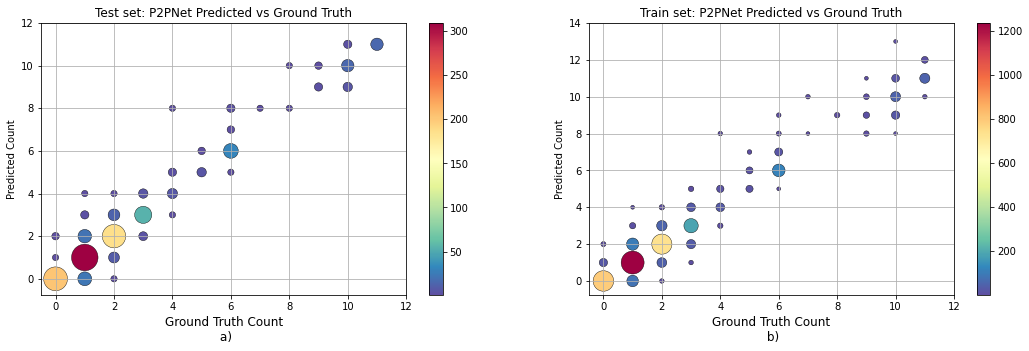

In [143]:
#https://stackoverflow.com/questions/32687826/how-can-i-account-for-identical-data-points-in-a-scatter-plot
g_names=["Test", "Train"]
gt_paths = (os.path.join(db_dir,"test_gt.txt"),os.path.join(db_dir,"train_gt.txt"))
p2p_pr_paths = (p2p_pth_test, p2p_pth_train)

fig=plt.figure(figsize=[18,5])

for x in range(2):
    gt_path=gt_paths[x]
    p2p_pr_path = p2p_pr_paths[x]

    p2p_pr_points = []
    with open(p2p_pr_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            p2p_pr_points.append([filename, count])

    gt_points = []
    with open(gt_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            gt_points.append([filename, count])

    gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
    p2p_pr_points_sorted = sorted(p2p_pr_points, key=lambda tup: tup[0])

    test_x=column(gt_points_sorted, 1)
    test_y=column(p2p_pr_points_sorted, 1) #  I am just generating some test x and y values. Use your data here

    points=list(set(zip(test_x,test_y))) 
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    ax=fig.add_subplot(1, 2, x+1)
    plt.xlim(-0.5, max(test_x)+1)
    plt.ylim(-0.75, max(test_y)+1)
    if x==0:
        plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    else:
        plt.scatter(plot_x,plot_y,c=count,s=15*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    plt.colorbar()
    plt.xlabel('Ground Truth Count\n {})'.format(alphabet_set[x]),fontsize=12)
    plt.ylabel('Predicted Count')
    plt.title(g_names[x]+ " set: P2PNet Predicted vs Ground Truth")
    plt.grid()
plt.show()

In [144]:
#List image names (+ their pred count) that were correctly predicted
correct = list(set(sorted(old_gt_test))&set(sorted(p2p_test)))
len(correct)

for i in range(len(correct)-1):
    if correct[i][1] == '5':
        print(correct[i])

#Flight3_20190821_17615.png 11, Flight3_20190821_17698.png 8, 
#deer_26098.png 6, Flight3_20190821_17707.png6, deer_19779.png 4, Flight3_20190613_092054__02186.png (bad 4)

('deer_26198.png', '5')
('deer_26200.png', '5')
('deer_26199.png', '5')
('deer_26191.png', '5')
('deer_26190.png', '5')


In [145]:
#Find pred count for specified names in fnames list
p2poutputs=[]
# fnames = ['Flight1_20190820__03441','Flight3_20190613_091724_05720','Flight3_20190613_092210__01128']
fnames = ['Flight3_20190821_17615','Flight1_20190820_02428','deer_19779'] #train

vis_test_dir = os.path.join('vis','run1','train')

# can find from p2p_pr_test.txt file 
for fname in fnames:
    for line in p2p_train:
        if line[0].startswith(fname):
            pre = os.path.splitext(line[0])[0]
            pred = line[1]
            img_path = os.path.join(p2p_dir, vis_test_dir,pre+"pred"+pred+".jpg")
            img = cv2.imread(img_path)
            p2poutputs.append([fname, pred, img])

# alternatively, iterate through all files in directory
# for fname in fnames:
#     for filename in os.listdir(os.path.join(p2p_dir, vis_test_dir)):
#         root, ext = os.path.splitext(filename)
#         if root.startswith(fname) and ext == '.jpg':
#             img = cv2.imread(os.path.join(p2p_dir, vis_test_dir,filename))
#             pred = root.split('pred')[1]
#             p2poutputs.append([fname, pred, img])
#             print(fname, pred)

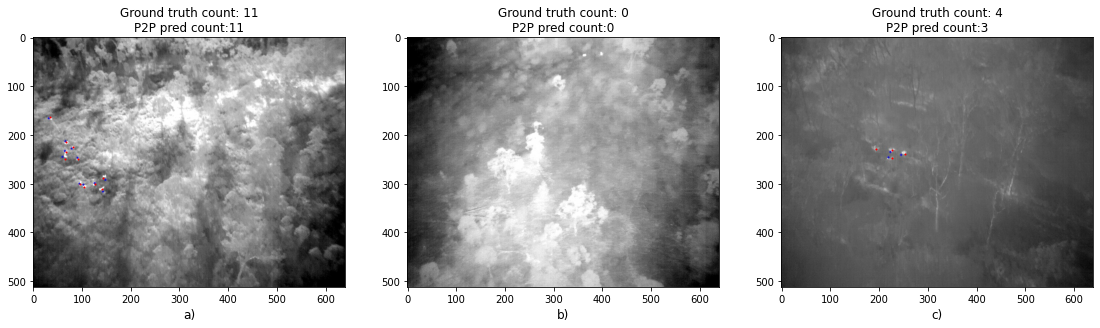

In [146]:
# Plot gt points over p2p output image
fig = plt.figure(figsize=[19,5])
for z in range(len(fnames)):
    ax =fig.add_subplot(1, len(fnames), z+1)
    # plt.imshow(cv2.cvtColor(p2poutputs[z][2], cv2.COLOR_BGR2RGB)) #BGR2RGB
    plt.imshow((p2poutputs[z][2])) #BGR2RGB

    count = 0
    with open(os.path.join(db_dir,"train",fnames[z] + ".txt")) as file:
        for line in file:
            x = int(float(line.split()[1])*640)
            y = int(float(line.split()[2])*512)
            plt.scatter(x, y, c='r', s=1)
            count += 1
    
    plt.title('Ground truth count: {}\nP2P pred count:{}'.format(count,p2poutputs[z][1]))
    plt.xlabel('{})'.format(alphabet_set[z]),fontsize=12)


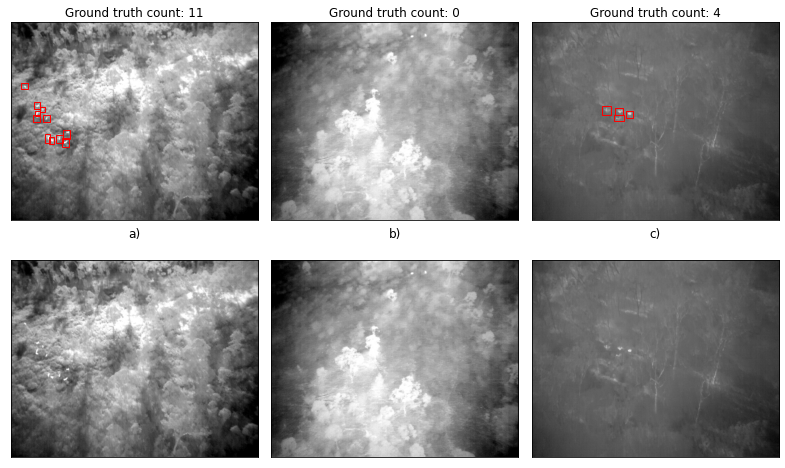

In [147]:
# Plot gt points and p2p output image seperately
fig = plt.figure(figsize=[14,8])
for z in range(len(fnames)):
    img = cv2.imread(os.path.join(db_dir,"train",fnames[z] + ".png"))
    count = 0
            
    ax = fig.add_subplot(2, len(fnames), z+1)
    with open(os.path.join(db_dir,"train",fnames[z] + ".txt")) as file:
        for line in file:
            count += 1
            # To plot co-ords 
            # x = int(float(line.split()[1])*640)
            # y = int(float(line.split()[2])*512)
            # plt.scatter(x, y, c='r', s=1)

            # To plot bounding boxes
            w = int(float(line.split()[3])*640)
            h = int(float(line.split()[4])*512)
            x = int(float(line.split()[1])*640)-w/2
            y = int(float(line.split()[2])*512)-h/2
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.title('Ground truth count: {}'.format(count))
    plt.xlabel('{})'.format(alphabet_set[z]),fontsize=12)

    plt.setp(ax, xticks=[], yticks=[])
    plt.imshow(img) 

# for z in range(3,6):
#     ax = fig.add_subplot(2, len(fnames), z+1)
#     plt.imshow(cv2.cvtColor(p2poutputs[z-3][2], cv2.COLOR_BGR2RGB)) #BGR2RGB
#     plt.title('P2P pred count:{}'.format(p2poutputs[z-3][1]))
#     plt.setp(ax, xticks=[], yticks=[])

for z in range(3,6):
    ax = fig.add_subplot(2, len(fnames), z+1)

    img = cv2.imread(os.path.join(db_dir,"train",fnames[z-3] + ".png"))
    plt.imshow(img)
    plt.setp(ax, xticks=[], yticks=[])

plt.subplots_adjust(wspace=0 )

# fig.savefig('example_images.png', bbox_inches='tight', dpi=100)